The idea of ​​this project is to analyze whether movie ratings on the Fandango website are close to real ones or whether they are fake.

Improting libraries

In [62]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

Creating a Data frame

In [63]:
fandango = pd.read_csv("fandango_scrape.csv")

Creating a new column with release year from film name column

In [64]:
fandango['YEAR'] = fandango['FILM'].apply(
    lambda title: title.split('(')[-1][:-1])  

Creating a graph showing filmns quantity by year    

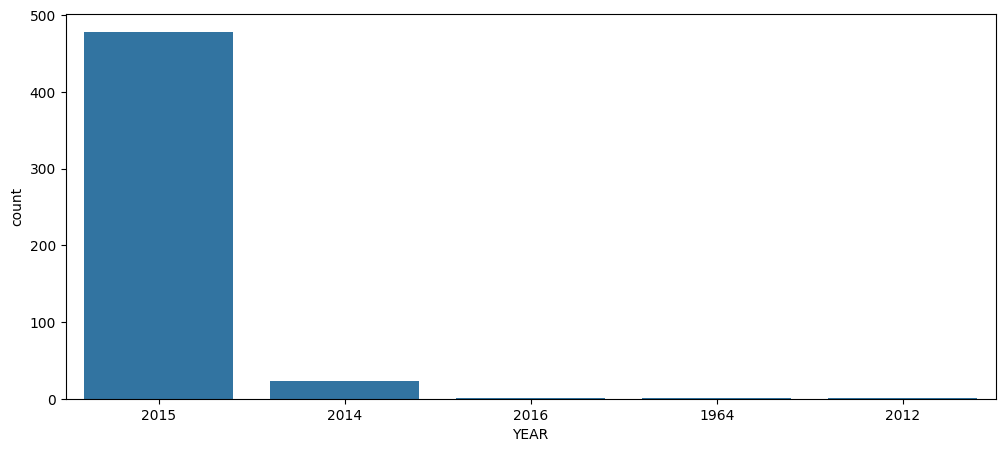

In [65]:
plt.figure(figsize=(12, 5))
sns.countplot(data=fandango, x='YEAR')            # graph films in year
plt.show()

Top ten films by votes on Fandango website

In [66]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


Films without rating on Fandango website

In [67]:
fandango[fandango['VOTES'] == 0].value_counts()

FILM                                             STARS  RATING  VOTES  YEAR
6 Years (2015)                                   0.0    0.0     0      2015    1
Our Man in Tehran (2015)                         0.0    0.0     0      2015    1
Selam Bahara Yolculuk (2015)                     0.0    0.0     0      2015    1
Searching For Home, Coming Back From War (2015)  0.0    0.0     0      2015    1
SDLFF: A Photographer's Journey (2015)           0.0    0.0     0      2015    1
                                                                              ..
La passion d'Augustine (2015)                    0.0    0.0     0      2015    1
Le gaucher (2015)                                0.0    0.0     0      2015    1
Le monde de demain (2015)                        0.0    0.0     0      2015    1
Le tireur (2015)                                 0.0    0.0     0      2015    1
Zarafa (2012)                                    0.0    0.0     0      2012    1
Name: count, Length: 69, dtype: i

Films with rating on Fandango website

In [68]:
f_with_votes = fandango[fandango['VOTES'] > 0]
f_with_votes

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


Drawing graph comparing stars and rating Fandango website

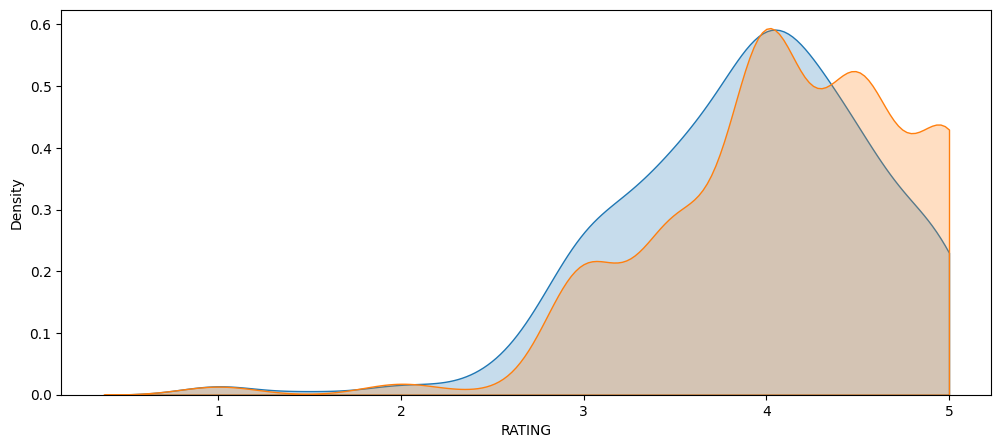

In [69]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=f_with_votes,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=f_with_votes,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')
plt.show()

Table showing difference between stars and votes

In [70]:
f_with_votes['STARS_DIFF'] = f_with_votes['STARS'] - f_with_votes['RATING']
f_with_votes['STARS_DIFF'] = f_with_votes['STARS_DIFF'].round(2)
print(f_with_votes.head(10))

                                               FILM  STARS  RATING  VOTES  \
0                       Fifty Shades of Grey (2015)    4.0     3.9  34846   
1                             Jurassic World (2015)    4.5     4.5  34390   
2                            American Sniper (2015)    5.0     4.8  34085   
3                                  Furious 7 (2015)    5.0     4.8  33538   
4                                 Inside Out (2015)    4.5     4.5  15749   
5  The Hobbit: The Battle of the Five Armies (2014)    4.5     4.3  15337   
6               Kingsman: The Secret Service (2015)    4.5     4.2  15205   
7                                    Minions (2015)    4.0     4.0  14998   
8                    Avengers: Age of Ultron (2015)    5.0     4.5  14846   
9                             Into the Woods (2014)    3.5     3.4  13055   

   YEAR  STARS_DIFF  
0  2015         0.1  
1  2015         0.0  
2  2015         0.2  
3  2015         0.2  
4  2015         0.0  
5  2014         0.2 

Graph quantity of films per difference in rating vs stars on Fandango website

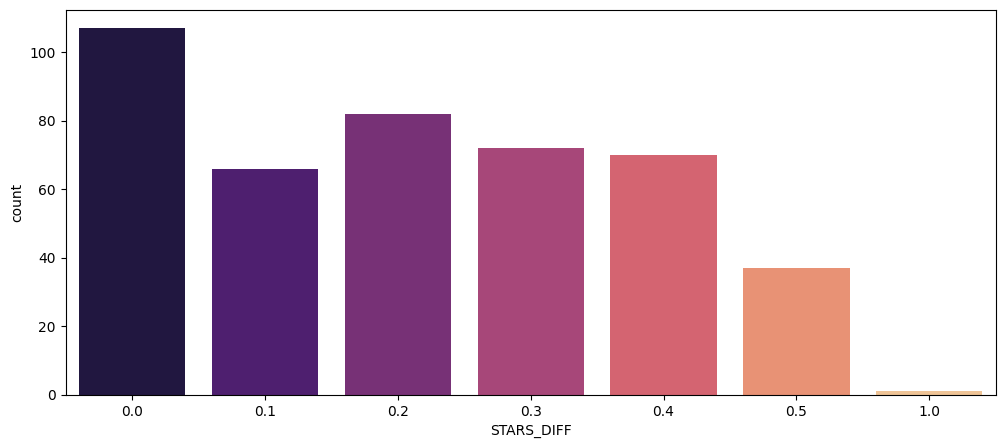

In [71]:
plt.figure(figsize=(12, 5))
sns.countplot(data=f_with_votes, x='STARS_DIFF', palette='magma')
plt.show()

Creating a new Data Frame from all_sites_scores.csv

In [72]:
all_sites = pd.read_csv("all_sites_scores.csv")
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


Creating a new column showing difference between critic scores and user scores on Rotten tomatoes website.
rotten_diff_mean - average difference betweens scores

In [73]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites['Rotten_Diff'] = all_sites['Rotten_Diff'].round(2)      
rotten_diff_mean = round(abs(all_sites['Rotten_Diff']).mean(), 2)
rotten_diff_mean

15.1

graph showing a difference spread

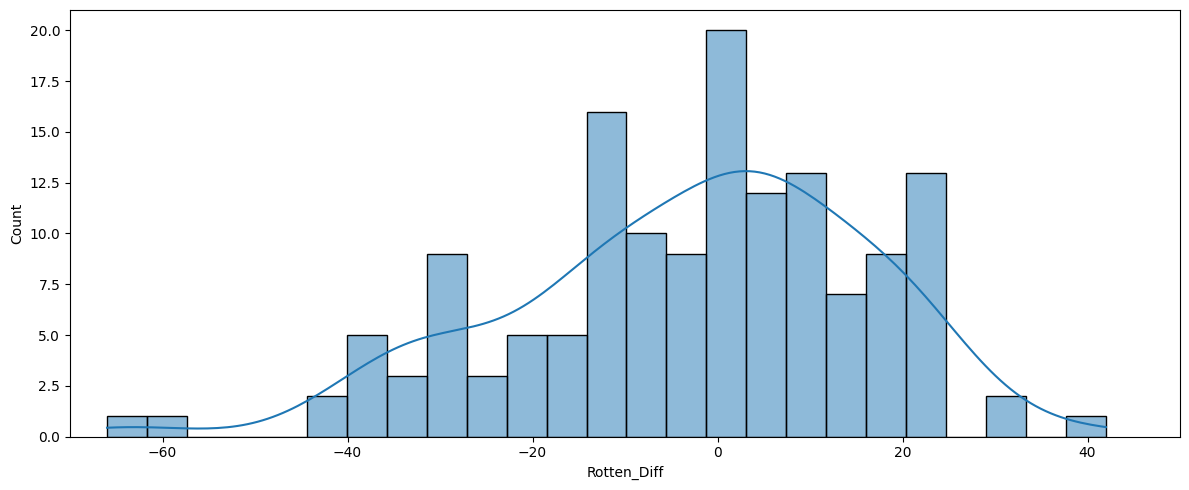

In [74]:
plt.figure(figsize=(12, 5))
sns.histplot(data=all_sites, x= 'Rotten_Diff', kde=True, bins=25)
plt.xlim(-70, 50)
plt.tight_layout()

graph showing a difference spread in absolute numbers

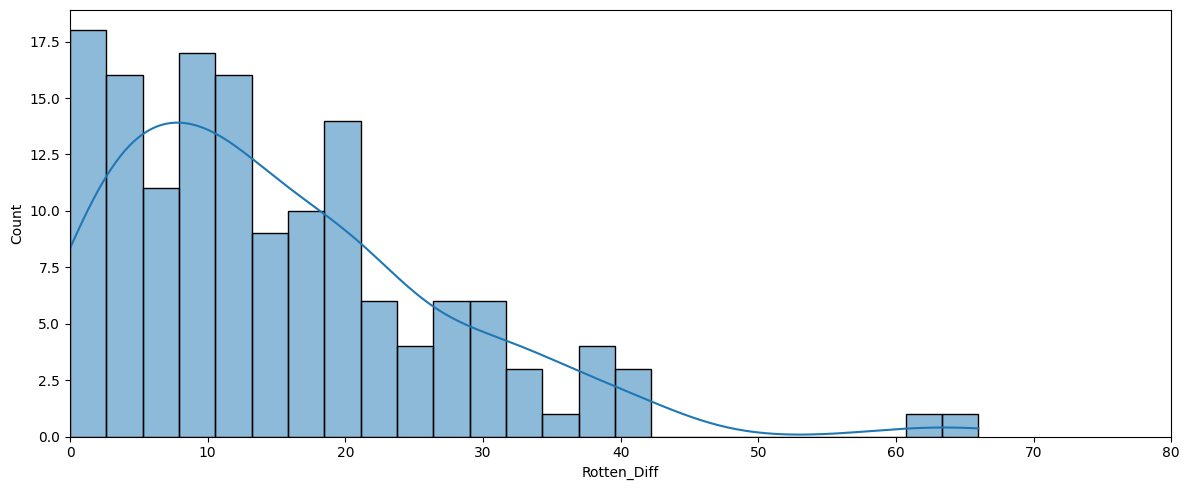

In [75]:
plt.figure(figsize=(12, 5))
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs),bins=25,kde=True)        
plt.xlim(0, 80)
plt.tight_layout()
plt.show()

biggest difference between critic raiting and user rating (lowest critic highest user)


In [76]:
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


biggest difference between critic raiting and user rating (highest critic lowest user)

In [77]:
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


Scatter graph comparing Metacritic rating and Metacritic user rating

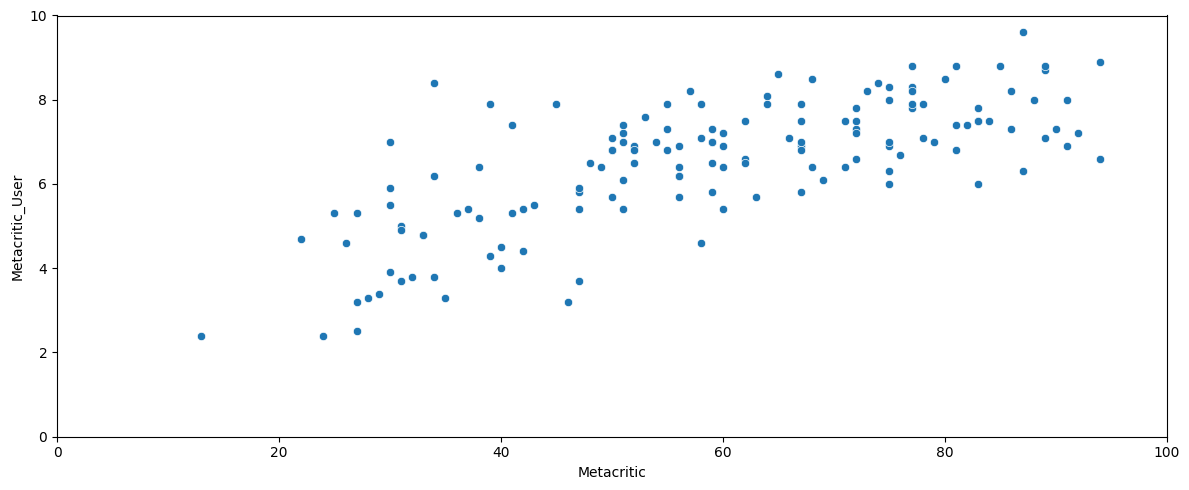

In [78]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)
plt.tight_layout()
plt.show()

graph comparing Metacritic user votes and IMDB user votes

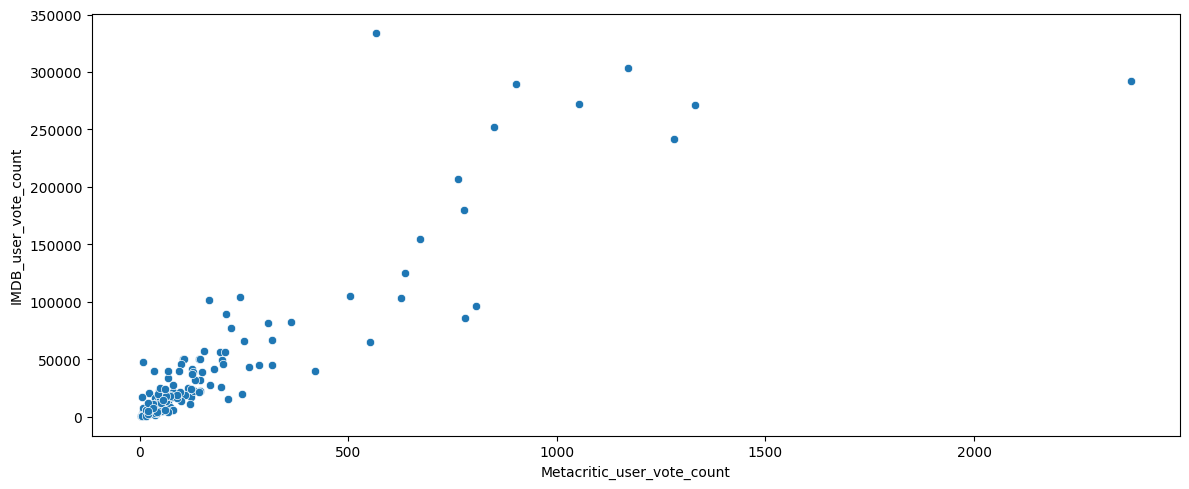

In [79]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')        # graph metacritic user votes vs IMDB  user votes
# plt.xlim(0,100)
# plt.ylim(0,10)
plt.tight_layout()
plt.show()

film with maximum user votes on IMDB

In [80]:
highest_IMDB = all_sites.nlargest(1, 'IMDB_user_vote_count')
highest_IMDB

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


megring 2 tables together, fandango and all other websites

In [81]:
df = pd.merge(fandango,all_sites,on='FILM',how='inner') 
df.head()


,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


Since all ratings have different scale there's a need to normalize it into one, for this particular case it'll be (0..5)
creating additional columns with normalized rating for each website

In [82]:
df['Metacritic_norm'] = round(df['Metacritic']/20, 1)
df['Metacritic_U_norm'] = round(df['Metacritic_User']/2, 1)
df['RottenTomatoes_norm'] = round(df['RottenTomatoes']/20, 1)         # normalizing raitings of different sites to the scale 0..5
df['RottenTomatoes_u_norm'] = round(df['RottenTomatoes_User']/20, 1) 
df['IMDB_norm'] = round(df['IMDB']/2, 1)

creating a new dataframe with only normalized ratings

In [83]:
norm_scores = df[['STARS','RATING', 'Metacritic_norm', 'Metacritic_U_norm', 'RottenTomatoes_norm', 'RottenTomatoes_u_norm', 'IMDB_norm', 'FILM']]
norm_scores

,STARS,RATING,Metacritic_norm,Metacritic_U_norm,RottenTomatoes_norm,RottenTomatoes_u_norm,IMDB_norm,FILM
0,4.0,3.9,2.3,1.6,1.2,2.1,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.0,3.5,3.6,4.0,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,3.3,3.6,4.2,3.7,American Sniper (2015)
3,5.0,4.8,3.4,3.4,4.0,4.2,3.7,Furious 7 (2015)
4,4.5,4.5,4.7,4.4,4.9,4.5,4.3,Inside Out (2015)
...,...,...,...,...,...,...,...,...
140,3.5,3.5,3.4,3.2,4.4,3.2,3.4,"Kumiko, The Treasure Hunter (2015)"
141,4.0,3.6,4.4,3.2,4.8,4.0,3.5,The Diary of a Teenage Girl (2015)
142,4.5,4.2,3.4,3.5,4.6,4.2,3.9,The Wrecking Crew (2015)
143,4.0,3.9,4.3,3.6,4.8,4.3,3.7,Tangerine (2015)


creating a function for custom legend for seaborn kde grapf

In [84]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legend_handles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws) 

creating a graph showing all normalized ratings together

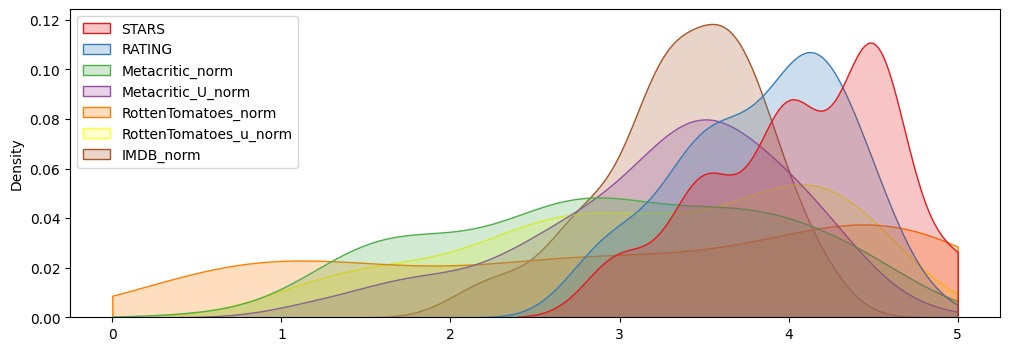

In [85]:
fig, ax = plt.subplots(figsize=(12,4),dpi=100)
sns.kdeplot(data=norm_scores,clip=[0,5], palette='Set1', ax=ax, fill=True)
move_legend(ax, "upper left")

The biggest difference is between stars on Fandango and Rotten Tomatoes rating
hext graph is showing it separately

<Axes: ylabel='Density'>

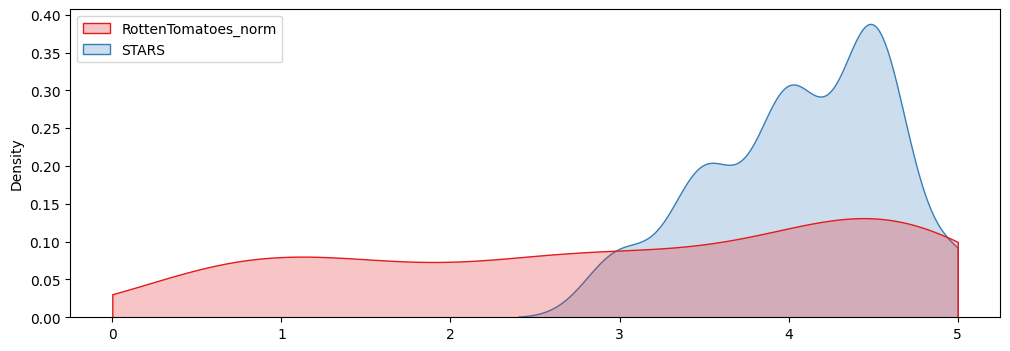

In [86]:
fig, ax = plt.subplots(figsize=(12,4),dpi=100)
sns.kdeplot(data=norm_scores[['RottenTomatoes_norm', 'STARS']], clip=[0,5], palette='Set1', ax=ax, fill=True)  

histogram with all ratings

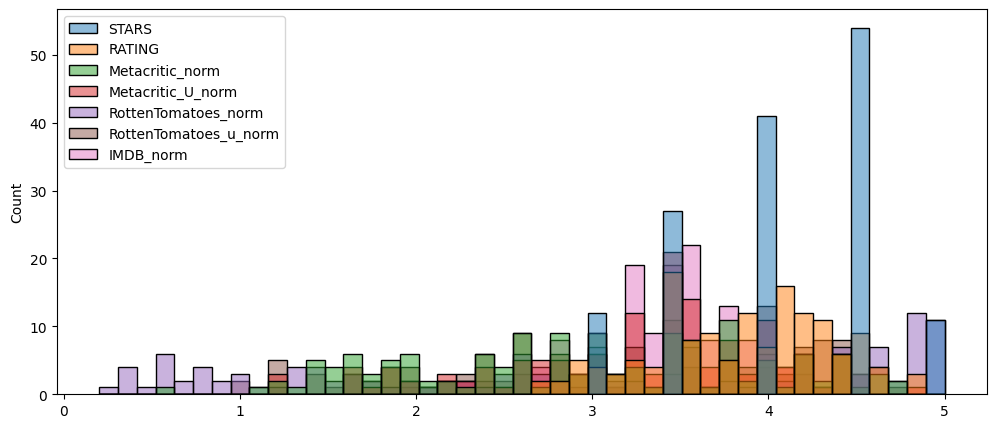

In [87]:
plt.figure(figsize=(12, 5))
sns.histplot(data=norm_scores, bins=45)
plt.show()

cluster graph (heat map) with all ratings

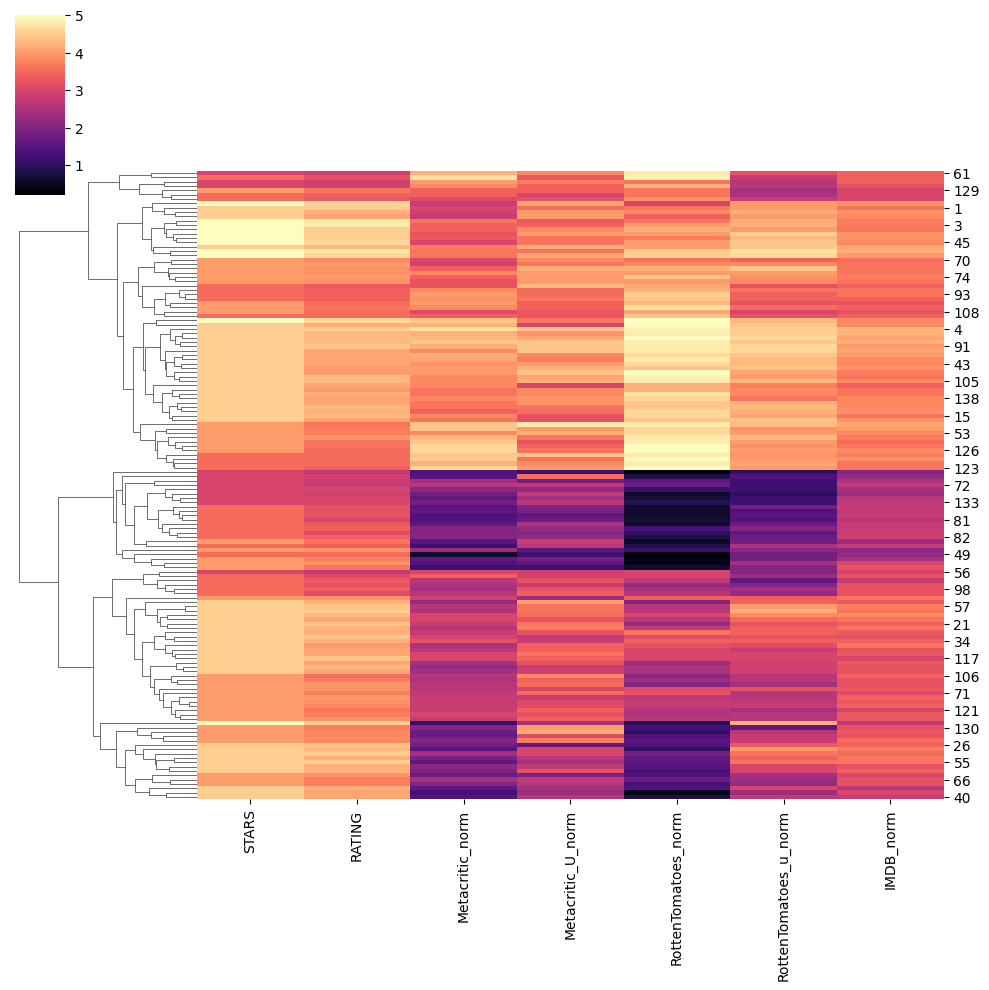

In [88]:
sns.clustermap(norm_scores[['STARS','RATING', 'Metacritic_norm', 'Metacritic_U_norm', 'RottenTomatoes_norm', 'RottenTomatoes_u_norm', 'IMDB_norm']],cmap='magma',col_cluster=False)


Top ten films with lowest normalized rating on Rotten Tomatoes

In [89]:
lowest_rt = norm_scores.nsmallest(10, 'RottenTomatoes_norm') 
lowest_rt

,STARS,RATING,Metacritic_norm,Metacritic_U_norm,RottenTomatoes_norm,RottenTomatoes_u_norm,IMDB_norm,FILM
49,3.5,3.5,0.6,1.2,0.2,1.8,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,1.3,2.3,0.4,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,1.4,1.2,0.4,1.0,2.0,Fantastic Four (2015)
54,4.0,3.7,1.6,1.8,0.4,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,1.4,1.6,0.4,2.4,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,1.5,2.8,0.5,1.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,1.5,2.0,0.6,1.8,2.8,Seventh Son (2015)
78,3.5,3.2,1.4,1.6,0.6,1.5,2.8,Mortdecai (2015)
83,3.5,3.3,1.6,2.5,0.6,1.7,2.8,Sinister 2 (2015)
87,3.5,3.2,1.6,1.9,0.6,1.4,2.7,Unfinished Business (2015)


final graph showing lowest Rotten tomatoes rating and ratings on other websites for these films from 

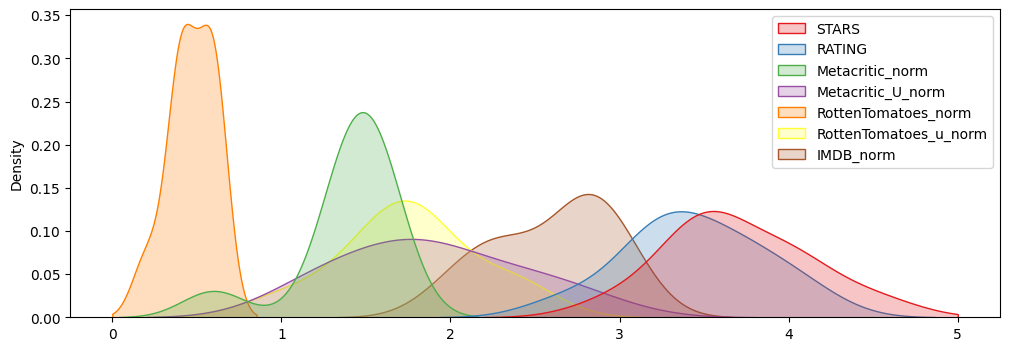

In [90]:
fig, ax = plt.subplots(figsize=(12,4),dpi=100)
sns.kdeplot(data=lowest_rt, clip=[0,5], palette='Set1', ax=ax, fill=True)
move_legend(ax, "upper right")

Summorising all given insights, we can see that stars and ratings on Fandango website are always ahigher even for the worst films
The biggest difference is for film "Taken 3" - 4.5 Stars on Fandango vs 1.86 average rating between other websites